In [2]:
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
import random
random.seed(1)
import cv2



from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, Dropout
from keras.layers import Dense
from keras import utils as np_utils
from keras.optimizers import SGD, Adam




import warnings
warnings.filterwarnings('ignore')

Loading the data from only one data_batch

In [3]:
def load_batch(file):
    path = '/home/admin1/Downloads/machine_learning/week15/'
    #file = 'cifar-10-python/cifar-10-batches-py/data_batch_2'

    f = open(path+file, 'rb')
    dict = pickle.load(f, encoding='latin1')
    images = dict['data']
    #images = np.reshape(images, (10000, 3, 32, 32))
    labels = dict['labels']
    imagearray = np.array(images)   #   (10000, 3072)
    labelarray = np.array(labels)   #   (10000,)
    
    return imagearray, labelarray

In [4]:
file = 'cifar-10-python/cifar-10-batches-py/data_batch_1'
image_array1, label_array1 = load_batch(file)

In [5]:
image_array1.shape, label_array1.shape

((10000, 3072), (10000,))

In [6]:
file = 'cifar-10-python/cifar-10-batches-py/data_batch_2'
image_array2, label_array2 = load_batch(file)

In [7]:
image_array2.shape, label_array2.shape

((10000, 3072), (10000,))

In [8]:
image = np.concatenate((image_array1, image_array2), axis=0)
label = np.concatenate((label_array1, label_array2), axis=0)

In [9]:
image.shape, label.shape

((20000, 3072), (20000,))

In [10]:
image

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [127, 139, 155, ..., 197, 192, 191],
       [190, 200, 208, ..., 163, 182, 192],
       [177, 174, 182, ..., 119, 127, 136]], dtype=uint8)

Reshaping the image array so as to make it 3 dimensional

In [12]:
images = np.reshape(image, (20000, 32, 32, 3))

In [12]:
images.shape

(20000, 32, 32, 3)

In [13]:
label

array([6, 9, 9, ..., 7, 2, 5])

Classes of label

In [14]:
np.unique(label)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
label = np_utils.to_categorical(label)

In [16]:
label[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
label.shape

(20000, 10)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(images, label, test_size = 0.2, random_state = 0)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 32, 32, 3), (4000, 32, 32, 3), (16000, 10), (4000, 10))

# Initialising the CNN

In [20]:
classifier = Sequential()

In [21]:
classifier.add(Convolution2D(filters = 32, kernel_size = (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
classifier.add(Convolution2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.25))



classifier.add(Convolution2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(Convolution2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(0.5))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Flattening

In [22]:
classifier.add(Flatten())

# Fully Connected Layer

In [23]:
classifier.add(Dense(units = 512, activation = 'relu'))

# Output Layer

In [24]:
classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling The CNN

In [25]:
opt=Adam(lr=0.001)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [26]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
__________

# Fitting the CNN to the Images

In [27]:
classifier.fit(x_train, y_train, 
          batch_size = 20, 
          nb_epoch = 6)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/6
16000/16000 [==============================] - 113s 7ms/step - loss: 14.4765 - acc: 0.1016
Epoch 2/6
16000/16000 [==============================] - 111s 7ms/step - loss: 14.4690 - acc: 0.1023
Epoch 3/6
16000/16000 [==============================] - 109s 7ms/step - loss: 14.4690 - acc: 0.1023
Epoch 4/6
16000/16000 [==============================] - 102s 6ms/step - loss: 14.4690 - acc: 0.1023
Epoch 5/6
16000/16000 [==============================] - 100s 6ms/step - loss: 14.4690 - acc: 0.1023
Epoch 6/6
16000/16000 [==============================] - 103s 6ms/step - loss: 14.4690 - acc: 0.1023


# Storing the model in pickle file

In [28]:
pickle.dump(classifier, open('model.pkl','wb'))

# Predicting the Test set Result

In [29]:
model = pickle.load(open('model.pkl', 'rb'))

In [30]:
y_pred = model.predict(x_test)

In [31]:
y_pred

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [32]:
y_pred = (y_pred > 0.5)

In [33]:
y_pred[100:120]

array([[False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, False, False,  True, False,
        False],
       [False, False, False, False, False, 

In [34]:
from sklearn.metrics import accuracy_score

In [58]:
score = accuracy_score(y_test, y_pred)
score

0.0975

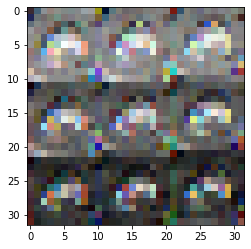

In [51]:
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.show()

In [57]:
images[0].shape

(32, 32, 3)

In [59]:
new_data = x_test[2]

In [60]:
new_data

array([[[174, 172, 170],
        [172, 173, 172],
        [171, 170, 171],
        ...,
        [156, 168, 169],
        [170, 171, 172],
        [173, 173, 174]],

       [[172, 170, 170],
        [169, 171, 170],
        [168, 168, 167],
        ...,
        [121, 140, 169],
        [166, 165, 169],
        [172, 172, 173]],

       [[173, 170, 171],
        [167, 162, 162],
        [160, 159, 158],
        ...,
        [162, 166, 169],
        [163, 164, 169],
        [171, 171, 172]],

       ...,

       [[ 79,  80,  85],
        [ 97, 113, 122],
        [116, 101,  79],
        ...,
        [154,  88,  78],
        [127, 155, 166],
        [129, 113, 167]],

       [[145, 138, 157],
        [155, 199, 210],
        [195, 148, 111],
        ...,
        [168, 135, 122],
        [176, 203, 183],
        [141, 165, 199]],

       [[164, 151, 173],
        [179, 185, 185],
        [194, 131,  77],
        ...,
        [ 55,  56,  73],
        [136, 159, 160],
        [111, 148, 203]]

# Testing on one image

In [61]:
new_data.shape

(32, 32, 3)

In [63]:
new_data = np.reshape(new_data, (1,32,32,3))

In [64]:
new_data.shape

(1, 32, 32, 3)

In [65]:
result = model.predict(new_data)

In [66]:
result

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)